### 1. Install and Import Dependencies

In [18]:
# pytorch 설치
# conda install pytorch torchvision -c pytorch
# pip3 install torch torchvision

import torch

In [19]:
# yolov5 repository 복제
!git clone https://github.com/ultralytics/yolov5  # clone

fatal: 대상 경로가('yolov5') 이미 있고 빈 디렉터리가 아닙니다.


In [20]:
# requirements.txt 내부에 있는 내용 설치
!cd yolov5 & pip install -r requirements.txt  # install

Processing /home/ktietz/src/ci/alabaster_1611921544520/work
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/ktietz/src/ci/alabaster_1611921544520/work'



In [21]:
!pip install opencv-python

In [22]:
import torch  # will be used to load the yolo model and make detections
from matplotlib import pyplot as plt  # will be used for visualizing images
import numpy as np  # will be used for array transformation
import cv2  # helps access the webcam and render feeds

### 2. Load Model

In [48]:
# pytorch hub : 사전 학습된 모델 저장소에 모델을 검색하고 공개하는 곳
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # 실제로 torch hub에서 사전 훈련된 초경량 모델을 로드하는 것
model

Using cache found in /Users/mac/.cache/torch/hub/ultralytics_yolov5_master
requirements: tqdm>=4.64.0 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /Users/mac/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-8-15 Python-3.9.7 torch-1.12.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

### 3. Make Detections with Images

In [ ]:
# 초기 감지를 수행하는 것
# 예를 들어, 이미지 내부의 일부 항목을 감지하고 싶을 때

In [24]:
# 공식 문서에서 사용하는 이미지 가져오기
# ms-coco class : 며칠동안 실제로 교통 비디오에서 자동차를 정말 잘 잡음
img = 'https://ultralytics.com/images/zidane.jpg'

In [25]:
results = model(img)
results.print()
# 이미지 1개만 통과 : 이미지 치수, 두 사람과 두 개의 넥타이가 감지됨

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1663.2ms pre-process, 352.7ms inference, 66.8ms NMS per image at shape (1, 3, 384, 640)


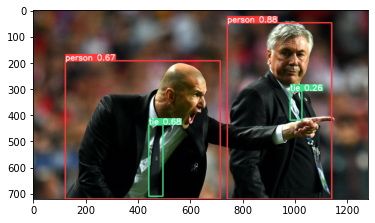

In [26]:
# 실제 렌더링
%matplotlib inline  # matplotlib을 사용하여 인라인으로 렌더링 할 수 있는지 확인
plt.imshow(np.squeeze(results.render()))
plt.show()

In [28]:
results.xyxy
# xyxy : 특정 모델에 대한 좌표 제공 [xmin, ymin, xmax, ymax, confidence, class]

[tensor([[7.42975e+02, 4.83955e+01, 1.14184e+03, 7.20000e+02, 8.81053e-01, 0.00000e+00],
         [4.42008e+02, 4.37522e+02, 4.96654e+02, 7.09974e+02, 6.75214e-01, 2.70000e+01],
         [1.23024e+02, 1.93287e+02, 7.15662e+02, 7.19724e+02, 6.65812e-01, 0.00000e+00],
         [9.82803e+02, 3.08417e+02, 1.02737e+03, 4.19987e+02, 2.60076e-01, 2.70000e+01]])]

In [29]:
results.show()
# 내부의 전체 이미지를 별도로 여는 것

In [30]:
results.render()
# 이미지의 배열 표현
# 실제로 감지가 그려진 이미지에서 이미지를 반환할 것

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [54, 20, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [72, 50, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 47],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

In [32]:
np.array(results.render()).shape  # (1, 720, 1280, 3)
np.squeeze(results.render()).shape  # (720, 1280, 3) 구성요소만 추출

(720, 1280, 3)

In [55]:
# car traffic
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/1599px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg?20190503075536'

In [56]:
results = model(img)
results.print()

image 1/1: 1066x1599 1 person, 31 cars, 4 trucks
Speed: 914.6ms pre-process, 314.9ms inference, 25.8ms NMS per image at shape (1, 3, 448, 640)


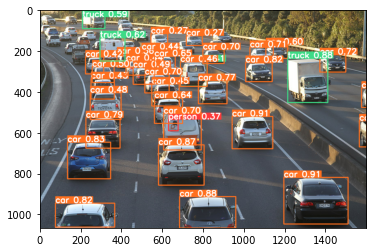

In [57]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

### 4. Real Time Detections

In [ ]:
# opencv를 활용하여 실시간으로 수행하기
# opencv : 실시간 이미지 프로세싱에 중점을 둔 라이브러리
# 실제로 웹캠에서 이미지에 엑세스 할 수 있는 일반적인 opencv 루프를 사용해 기본 모델로 수행
cap = cv2.VideoCapture(0)  # 내 웹캠이 VideoCapture 장치가 0이기 때문에 우리의 웹캠에 엑세스하는 것 / 실시간 피드를 얻지 못하면 다시 재생
while cap.isOpened():  # cap이 열려있는 동안 cap.read()를 읽고 해당 캡처 장치에서 변수를 추출하거나 압축 풀기
    ret, frame = cap.read()  # 반환 값은 웹캠의 프레임 또는 이미지와 함께 반환
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))  # frame 이름을 통해 전달된 cv2.imshow이므로 실제로 렌더링 할 때 팝업이 표시되고 상단 표시줄의 이름은 YOLO로 뜸
    
    if cv2.waitKey(10) & 0xFF == ord('q'):  # 종료, 루프 벗어나기
        break

cap.release()  # 캡처 장치, 웹캠 해제 
cv2.waitKey(0)
cv2.destroyAllWindows() # 창 닫기
cv2.waitKey(0)

### 5. Train from scratch

In [ ]:
# 커스텀 모델을 실제로 훈련시키는 것
# 위와 동일한 루프를 사용하여 졸음 및 졸리지 않은 이미지를 수집
# 실시간 피드를 캡처할 뿐만 아니라 다른 클래스의 이미지도 저장하도록 코드 업데이트

In [73]:
import uuid   # Unique identifier(고유 식별자 생성)
import os
import time

In [74]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

### 6. Load Custom Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

In [ ]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
# 운전 졸음 방지 감지 시스템..?